# QR decomposition - introduction

### References

* Lawson, C. L,. and Hanson, R. J. (1995). Solving least squares problems. SIAM, ISBN 0-89871-356-0

* Golub, G. H. and C. F. Van Loan, (2013), Matrix computations, 4th edition, Johns Hopkins University Press, ISBN 978-1-4214-0794-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

### Definition

Let $\mathbf{A}$ be an $M \times N$ matrix. There is an $M \times M$ orthogonal matrix $\mathbf{Q}$ such that

<a id='eq1'></a>
$$
\mathbf{A} = \mathbf{Q} \, \mathbf{R} \quad , \tag{1}
$$

where $\mathbf{R}$ is an $M \times N$ upper triangular matrix. There is an importan theorem for the particualr case in which $\mathbf{A}$ is a full-column rank $M \times N$ matrix, where $M \ge N$ (Golub and Van Loan, 2013, p. 248):

<a id='theorem_thin_QR'></a>
**THEOREM:** Suppose $\mathbf{A} \in \mathbb{R}^{M \times N}$ has full column rank. The *thin QR factorization* 

$$
\mathbf{A} = \mathbf{Q}_{1} \, \mathbf{R}_{1} \quad ,
$$

is unique where $\mathbf{Q}_{1}$ has orthonormal columns and $\mathbf{R}_{1}$ is upper triangular with positive diagonal entries. Moreover, $\mathbf{R}_{1} = \mathbf{G}^{\top}$, where $\mathbf{G}$ is the lower triangular Cholesky factor of $\mathbf{A}^{\top}\mathbf{A}$.

### Create synthetic data

In [2]:
np.random.seed(6)
M = 13
N = 10

In [3]:
A = np.round(np.random.rand(M,N), decimals=3)

In [6]:
Q, R = np.linalg.qr(A, mode='complete')

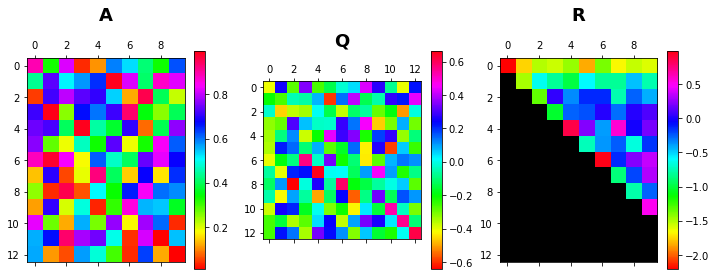

In [16]:
cmap = plt.cm.hsv
cmap.set_bad(color='black')

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('$\mathbf{A}$\n', fontsize=18)
#plt.matshow(A, fignum=0, cmap='jet')
A_masked = np.ma.masked_where(A == 0, A)
plt.matshow(A_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(132)
plt.title('$\mathbf{Q}$\n', fontsize=18)
#plt.matshow(Q, fignum=0, cmap='jet')
Q_masked = np.ma.masked_where(Q == 0, Q)
plt.matshow(Q_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(133)
plt.title('$\mathbf{R}$\n', fontsize=18)
#plt.matshow(R, fignum=0, cmap='jet')
R_masked = np.ma.masked_where(R == 0, R)
plt.matshow(R_masked, fignum=0, cmap=cmap)
plt.colorbar()

#plt.tight_layout()
plt.show()

In [24]:
A.shape, Q.shape, R.shape

((13, 10), (13, 13), (13, 10))

In [25]:
np.allclose(np.identity(M), np.dot(Q.T,Q))

True

In [26]:
np.allclose(np.identity(M), np.dot(Q,Q.T))

True

### Least squares solution via QR decomposition

See Golub and Van Loan (2013, p. 263).

Consider the linear system

<a id='eq2'></a>
$$
\mathbf{A} \, \mathbf{x} = \mathbf{b} \quad , \tag{2}
$$

where $\mathbf{A}$ is an $M \times N$ full-column rank matrix with $M \ge N$.

<a id='eq2a'></a>
$$
\mathbf{Q}^{\top} \mathbf{A} = \mathbf{R} \quad , \tag{2a}
$$

<a id='eq2b'></a>
$$
\mathbf{R} = \begin{bmatrix}
\mathbf{R}_{1} \\
\mathbf{0}
\end{bmatrix} \quad , \tag{2b}
$$

where $\mathbf{R}_{1}$ is an $N \times N$ upper triangular matrix and $\mathbf{0}$ is a $(M-N) \times N$ matrix of zeros.

<a id='eq3'></a>
$$
\mathbf{Q}^{\top} \mathbf{b} = \begin{bmatrix}
\mathbf{c} \\
\mathbf{d}
\end{bmatrix} \quad , \tag{3}
$$

where $\mathbf{c}$ and $\mathbf{d}$ are $N \times 1$ and $(M-N) \times 1$ vectors.

<a id='eq4'></a>
$$
\begin{split}
\left[ \mathbf{A} \, \mathbf{x} - \mathbf{b} \right]^{\top}\left[ \mathbf{A}\, \mathbf{x} - \mathbf{b} \right] 
&= \left[ \mathbf{A} \, \mathbf{x} - \mathbf{b} \right]^{\top}\mathbf{Q}\mathbf{Q}^{\top} \left[ \mathbf{A}\, \mathbf{x} - \mathbf{b} \right] \\
&= \left[ \mathbf{Q}^{\top} \mathbf{A} \, \mathbf{x} - \mathbf{Q}^{\top} \mathbf{b} \right]^{\top} \left[ \mathbf{Q}^{\top} \mathbf{A}\, \mathbf{x} - \mathbf{Q}^{\top} \mathbf{b} \right] \\
&= \left[ \mathbf{R} \, \mathbf{x} - \mathbf{Q}^{\top} \mathbf{b} \right]^{\top} \left[ \mathbf{R} \, \mathbf{x} - \mathbf{Q}^{\top} \mathbf{b} \right] \\
&= \left[ \mathbf{R}_{1} \, \mathbf{x} - \mathbf{c} \right]^{\top} \left[ \mathbf{R}_{1} \, \mathbf{x} - \mathbf{c} \right] + \left[ \mathbf{0} \, \mathbf{x} - \mathbf{d} \right]^{\top} \left[ \mathbf{0} \, \mathbf{x} - \mathbf{d} \right]\\
&= \left[ \mathbf{R}_{1} \, \mathbf{x} - \mathbf{c} \right]^{\top} \left[ \mathbf{R}_{1} \, \mathbf{x} - \mathbf{c} \right] + \mathbf{d}^{\top}\mathbf{d} 
\end{split} \quad . \tag{4}
$$

<a id='eq5a'></a>
$$
\mathbf{R}_{1} \, \mathbf{x}^{\ast} = \mathbf{c} \quad , \tag{5a}
$$

<a id='eq5b'></a>
$$
\rho = \sqrt{\mathbf{d}^{\top}\mathbf{d}} \quad . \tag{5b}
$$

In [4]:
x_true = np.random.rand(N) + 1

In [5]:
y = np.dot(A, x_true)

In [18]:
QTy = np.dot(Q.T,y)
c = QTy[:N]
rho = np.linalg.norm(QTy[N:])

In [19]:
x_ast = np.linalg.solve(R[:N], c)

In [20]:
print(x_true)

[1.27666659 1.30154554 1.18031763 1.06697796 1.77923395 1.40074847
 1.24581485 1.52377219 1.25498569 1.85190846]


In [21]:
print(x_ast)

[1.27666659 1.30154554 1.18031763 1.06697796 1.77923395 1.40074847
 1.24581485 1.52377219 1.25498569 1.85190846]


In [22]:
print(rho)

1.4238265370861067e-15
